In [5]:
import os
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot 
import mpl_toolkits.axisartist as AA
import pandas
import math
import numpy
import torch
import sys
sys.setrecursionlimit(1000000)


def save(obj, filename):
    with open(filename, 'wb') as output:  # Overwrites any existing file.
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)
    return 1

##-- Load obj from file    
def load(filename):
    with open(filename, 'rb') as input: 
        obj = pickle.load(input)
    return obj   

#def visual_plot(df1, df2, fig_save_dir):
def visual_plot(df1,  fig_save_dir): 
    plt.plot(df1, color = 'blue')
    plt.plot(df2, color = 'salmon')
    plt.savefig(fig_save_dir)
    #plt.clf()

In [6]:
df = load('./figs/pickle/New York/RNN.pkl')

In [1]:
df

NameError: name 'df' is not defined

RecursionError: maximum recursion depth exceeded while calling a Python object

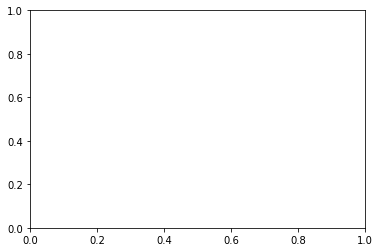

In [4]:
models = ['True value.pkl', 'AR.pkl', 'GAR.pkl', 'VAR.pkl', 'RNNCON_Res.pkl']
style = ['dimgrey', 'y--', 'g--', 'b--', 'r--']
for state in ['New York', 'New Jersey', 'Connecticut', 'Illinois', 'Michigan', 'Alabama', 'California', 'Arizona', 'Utah', 'North Carolina']:
    for i in range(len(models)):
        save_dir = './figs/pickle/{}/{}'.format(state, models[i])
        df = load(save_dir)
        if models[i] == 'True value.pkl':
            plt.plot(df.iloc[41:], style[i], label = models[i][:-4])
            continue
        plt.plot(df, style[i], label = models[i][:-4])
    plt.legend(loc = 'upper left')
    plt.xlabel('Number of days since the first confirmed case')
    plt.ylabel('Daily confirmed cases')
    fig_save_dir = './figs/pickle/{}/state prediction.png'.format(state)
    plt.savefig(fig_save_dir, dpi=300)
    plt.clf()

In [ ]:
fin = open('./data/us_states/data.txt')
rawdat = numpy.loadtxt(fin,delimiter=',')
rawdat[41:141]

In [ ]:
fin = open('./data/us_states/data_41.txt')
rawdat_41 = numpy.loadtxt(fin,delimiter=',')
rawdat_41

In [ ]:
fin = open('./data/us_states/tweets_cases.txt')
tweets_np = numpy.loadtxt(fin,delimiter=',')
tweets_volume = []
date = 41
for tweet in tweets_np:
    n = sum(tweet)
    tweets_volume.append(n)
    print("{} of tweets at {} is added".format(n, date))
    date += 1 
df_tweets_sum = pandas.DataFrame(tweets_volume, index = range(41,141))
plt.plot(df_tweets_sum)

In [ ]:
models = ['GAR', 'AR', 'VAR', 'RNNCON_Res']
epochs = [200, 30, 70, 160]


In [ ]:
plt.bar(models, epochs, color = ['r', 'b', 'yellow', 'green'])

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(10,5))
# h =1 
models = ['GAR', 'VAR', 'AR', 'RNNCON-Res']
epochs = [280, 1500, 200, 160]
ax[0][0].bar(models, epochs, color = ['g', 'b', 'y', 'r'], width = 0.4)
ax[0][0].set_title("Number of timesteps = 1", fontsize=12)
ax[0][0].set_xlabel('model')
ax[0][0].set_ylabel('epoch')
ax[0][0].set_ylim(0, 1500)
# h=4
epochs = [330, 430, 300, 160]
ax[0][1].bar(models, epochs, color = ['g', 'b', 'y', 'r'], width = 0.4)
ax[0][1].set_title("Number of timesteps = 4", fontsize=12)
ax[0][1].set_xlabel('model')
ax[0][1].set_ylabel('epoch')
ax[0][1].set_ylim(0, 1500)

# h = 8
epochs = [350, 450, 300, 160]
ax[0][2].bar(models, epochs, color = ['g', 'b', 'y', 'r'], width = 0.4)
ax[0][2].set_title("Number of timesteps = 8", fontsize=12)
ax[0][2].set_xlabel('model')
ax[0][2].set_ylabel('epoch')
ax[0][2].set_ylim(0, 1500)

# h = 12
epochs = [195, 600, 120, 160]
ax[1][0].bar(models, epochs, color = ['g', 'b', 'y', 'r'], width = 0.4)
ax[1][0].set_title("Number of timesteps = 12", fontsize=12)
ax[1][0].set_xlabel('model')
ax[1][0].set_ylabel('epoch')
ax[1][0].set_ylim(0, 1500)

# h = 16
epochs = [170, 600, 120, 179]
ax[1][1].bar(models, epochs, color = ['g', 'b', 'y', 'r'], width = 0.4)
ax[1][1].set_title("Number of timesteps = 16", fontsize=12)
ax[1][1].set_xlabel('model')
ax[1][1].set_ylabel('epoch')
ax[1][1].set_ylim(0, 1500)

# h = 20
epochs = [300, 88, 400, 164]
ax[1][2].bar(models, epochs, color = ['g', 'b', 'y', 'r'], width = 0.4)
ax[1][2].set_title("Number of timesteps = 20", fontsize=12)
ax[1][2].set_xlabel('model')
ax[1][2].set_ylabel('epoch')
ax[1][2].set_ylim(0, 1500)

plt.subplots_adjust(wspace = 0.5, hspace = 0.7)
plt.savefig('Number of epoch to criterion.png')


In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(10,5))
# h =1 
models = ['RNN', 'RNN-Res', 'RNNCON-Res']
epochs = [612.20, 197.20, 202.77]
ax[0][0].bar(models, epochs, color = ['cornflowerblue', 'lightskyblue', 'blue'], width = 0.4)
ax[0][0].set_title("Number of timesteps = 1", fontsize=12)
ax[0][0].set_xlabel('model')
ax[0][0].set_ylabel('RMSE loss')
ax[0][0].set_ylim(0, 650)
# h=4
epochs = [611.66, 220, 209.16]
ax[0][1].bar(models, epochs, color = ['cornflowerblue', 'lightskyblue', 'blue'], width = 0.4)
ax[0][1].set_title("Number of timesteps = 4", fontsize=12)
ax[0][1].set_xlabel('model')
ax[0][1].set_ylabel('RMSE loss')
ax[0][1].set_ylim(0, 650)

# h = 8
epochs = [611.64, 251.25, 269.70]
ax[0][2].bar(models, epochs, color = ['cornflowerblue', 'lightskyblue', 'blue'], width = 0.4)
ax[0][2].set_title("Number of timesteps = 8", fontsize=12)
ax[0][2].set_xlabel('model')
ax[0][2].set_ylabel('RMSE loss')
ax[0][2].set_ylim(0, 650)

# h = 12
epochs = [519.11, 322.26, 307.92]
ax[1][0].bar(models, epochs, color = ['cornflowerblue', 'lightskyblue', 'blue'], width = 0.4)
ax[1][0].set_title("Number of timesteps = 12", fontsize=12)
ax[1][0].set_xlabel('model')
ax[1][0].set_ylabel('RMSE loss')
ax[1][0].set_ylim(0, 650)

# h = 16
epochs = [510, 308.43, 322.48]
ax[1][1].bar(models, epochs,color = ['cornflowerblue', 'lightskyblue', 'blue'], width = 0.4)
ax[1][1].set_title("Number of timesteps = 16", fontsize=12)
ax[1][1].set_xlabel('model')
ax[1][1].set_ylabel('RMSE loss')
ax[1][1].set_ylim(0, 650)

# h = 20
epochs = [500, 343.63, 329.67]
ax[1][2].bar(models, epochs, color = ['cornflowerblue', 'lightskyblue', 'blue'], width = 0.4)
ax[1][2].set_title("Number of timesteps = 20", fontsize=12)
ax[1][2].set_xlabel('model')
ax[1][2].set_ylabel('RMSE loss')
ax[1][2].set_ylim(0, 650)

plt.subplots_adjust(wspace = 0.5, hspace = 0.7)
plt.savefig('Ablation tests.png')